# Auto Machine Learning by Pycaret

## 1.0 - Libraries & Functions

In [ ]:
# languages download
#!python -m spacy download en_core_web_sm
#!python -m textblob.download_corpora
#!pip install numpy==1.20

In [1]:
# Data extraction and manipulation
from pycaret.datasets import get_data
import pandas as pd
import numpy as np

#setting jupyter
from IPython.core.display import display, HTML

# data vizualizarion
import matplotlib.pyplot as plt 
import seaborn as sns

# Pre processing and Modeling
from pycaret.nlp import *
from pycaret.utils import check_metric

/tmp/ipykernel_12672/3621423694.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
# Jupyter Functions
def jupyter_settings():
    %matplotlib inline

    plt.style.use('bmh')
    plt.rcParams['figure.figsize'] = [25,12]
    plt.rcParams['font.size'] = 20

    pd.options.display.max_columns = 100
    pd.options.display.max_rows = 60
    pd.set_option('display.expand_frame_repr', False)

    display(HTML('<style>.conteiner{width:95% !import;}</style>'))

    sns.set()
jupyter_settings()

## 2.0 - Data Extraction

In [3]:
df = get_data(dataset='kiva')
print(f"Number of Rows: {df.shape[0]} Number of Columns: {df.shape[1]}")

,country,en,gender,loan_amount,nonpayment,sector,status
0,Dominican Republic,"""Banco Esperanza"" is a group of 10 women looki...",F,1225,partner,Retail,0
1,Dominican Republic,"""Caminemos Hacia Adelante"" or ""Walking Forward...",F,1975,lender,Clothing,0
2,Dominican Republic,"""Creciendo Por La Union"" is a group of 10 peop...",F,2175,partner,Clothing,0
3,Dominican Republic,"""Cristo Vive"" (""Christ lives"" is a group of 10...",F,1425,partner,Clothing,0
4,Dominican Republic,"""Cristo Vive"" is a large group of 35 people, 2...",F,4025,partner,Food,0


Number of Rows: 6818 Number of Columns: 7


In [4]:
# sampling data
df = df.sample(n=1000, random_state=786).reset_index(drop=True)

## 3.0 - Data Analysis

In [15]:
df.head()

,country,en,gender,loan_amount,nonpayment,sector,status
0,Kenya,Praxides is married with four children who are...,F,75,partner,Services,0
1,Kenya,Dr. Odongo is an obs/ gynaecology practitioner...,M,1200,partner,Health,0
2,Dominican Republic,Ana Josefa is a single mother living in San C...,F,150,partner,Clothing,0
3,Kenya,Phanice is married with seven children. She ha...,F,150,lender,Services,1
4,Kenya,Fredrice Nzioka Kilonzo is 26 years old and ow...,F,300,lender,Food,1


In [25]:
# Describing data
print(f"Number of Rows: {df.shape[0]} Number of Columns: {df.shape[1]}")
pd.concat(
    [
        df.dtypes,
        df.isna().mean(),
        df.nunique(),
        df.mean(),
        df.median(),
        df.min(),
        df.max()
    ], axis=1
).rename(columns={
    0:'dtypes',
    1:'%_null',
    2:'unique',
    3:'mean',
    4:'median',
    5:'min',
    6:'max'
})

Number of Rows: 1000 Number of Columns: 7


/tmp/ipykernel_8138/167776881.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean(),
/tmp/ipykernel_8138/167776881.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median(),


,dtypes,%_null,unique,mean,median,min,max
country,object,0.0,3,NaN,NaN,Dominican Republic,Kenya
en,object,0.0,998,NaN,NaN,"""Esfuerzate y Sed Valiente"" is a group of 10 w...",ngel sells tortillas and empanadas in downtown...
gender,object,0.0,2,NaN,NaN,F,M
loan_amount,int64,0.0,92,710.775,600.0,25,5000
nonpayment,object,0.0,2,NaN,NaN,lender,partner
sector,object,0.0,13,NaN,NaN,Agriculture,Transportation
status,int64,0.0,2,0.496,0.0,0,1


In [ ]:
categorial_values=[
    'country', 'en', 'gender', 'nonpayment', 'sector']
numeric_features=['loan_amount']
bin_numeric_features=['status']

## 4.0 - Pre Processing

## 5.0 - Modeling

In [5]:
# Setup parameters of model
exp_01 = setup(
    data=df,
    target='en',
    session_id=123
)

Description,Value
session_id,123
Documents,1000
Vocab Size,4615
Custom Stopwords,False


In [6]:
# create model
lda = create_model(model='lda')

In [9]:
# loading dataframe with model created
df_proc = assign_model(model=lda)
df.shape, df_proc.shape

((1000, 7), (1000, 13))

In [8]:
df_proc.head()

,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Dominant_Topic,Perc_Dominant_Topic
0,Kenya,praxide marry child primary school train tailo...,F,75,partner,Services,0,0.169828,0.007741,0.821958,0.000473,Topic 2,0.82
1,Kenya,gynaecology practitioner run year old life wif...,M,1200,partner,Health,0,0.004903,0.335249,0.659392,0.000456,Topic 2,0.66
2,Dominican Republic,live child boy girl range year old sell new us...,F,150,partner,Clothing,0,0.522153,0.099910,0.377378,0.000559,Topic 0,0.52
3,Kenya,phanice marry child daughter secondary school ...,F,150,lender,Services,1,0.051998,0.105731,0.841686,0.000585,Topic 2,0.84
4,Kenya,year old hotel last year get good return compe...,F,300,lender,Food,1,0.199125,0.007041,0.793332,0.000501,Topic 2,0.79


## 6.0 - Performance

In [10]:
plot_model(model=lda, plot='frequency')

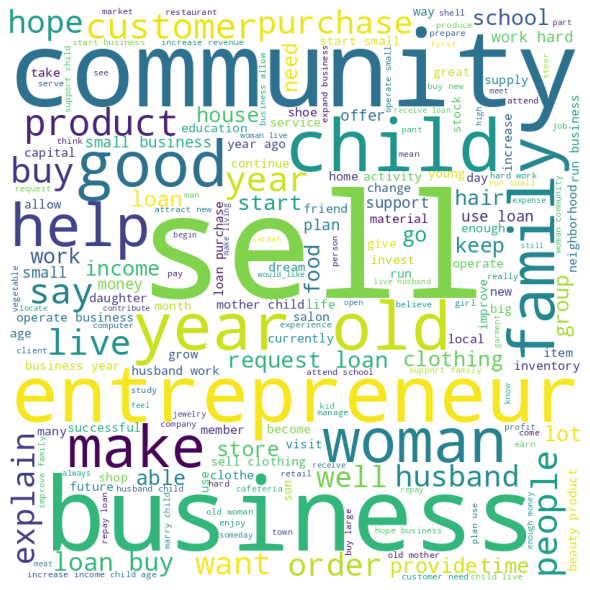

In [12]:
plot_model(model=lda, plot="wordcloud")

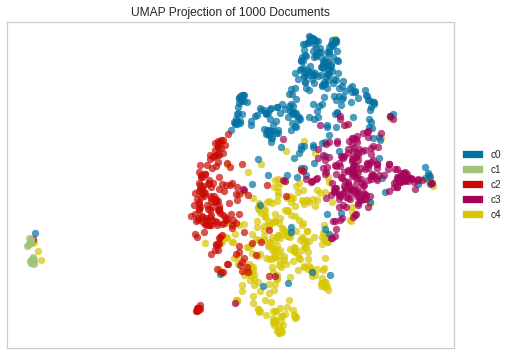

In [13]:
plot_model(model=lda, plot="umap")

## 7.0 - tunning for classification project

In [16]:
tunned_model = tune_model(
    model='lda', 
    multi_core=True, 
    supervised_target='status',
    estimator='xgboost',
    optimize='Precision'
)

IntProgress(value=0, description='Processing: ', max=25)

Output()

Best Model: Latent Dirichlet Allocation | # Topics: 200 | Precision : 0.9048


## 8.0 - deploy

In [21]:
# fitting the data by model lda
nlp_dataset = assign_model(model=tunned_model)
print(f"shape after NLP: {nlp_dataset.shape}")
nlp_dataset.head()

shape after NLP: (1000, 209)


,country,en,gender,loan_amount,nonpayment,sector,status,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9,Topic_10,Topic_11,Topic_12,Topic_13,Topic_14,Topic_15,Topic_16,Topic_17,Topic_18,Topic_19,Topic_20,Topic_21,Topic_22,Topic_23,Topic_24,Topic_25,Topic_26,Topic_27,Topic_28,Topic_29,Topic_30,Topic_31,Topic_32,Topic_33,Topic_34,Topic_35,Topic_36,Topic_37,Topic_38,Topic_39,Topic_40,Topic_41,Topic_42,...,Topic_152,Topic_153,Topic_154,Topic_155,Topic_156,Topic_157,Topic_158,Topic_159,Topic_160,Topic_161,Topic_162,Topic_163,Topic_164,Topic_165,Topic_166,Topic_167,Topic_168,Topic_169,Topic_170,Topic_171,Topic_172,Topic_173,Topic_174,Topic_175,Topic_176,Topic_177,Topic_178,Topic_179,Topic_180,Topic_181,Topic_182,Topic_183,Topic_184,Topic_185,Topic_186,Topic_187,Topic_188,Topic_189,Topic_190,Topic_191,Topic_192,Topic_193,Topic_194,Topic_195,Topic_196,Topic_197,Topic_198,Topic_199,Dominant_Topic,Perc_Dominant_Topic
0,Kenya,praxide marry child primary school train tailo...,F,75,partner,Services,0,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,...,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,Topic 149,0.98
1,Kenya,gynaecology practitioner run year old life wif...,M,1200,partner,Health,0,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,...,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.424821,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,Topic 187,0.42
2,Dominican Republic,live child boy girl range year old sell new us...,F,150,partner,Clothing,0,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.060822,0.000114,0.000114,0.000114,0.000114,...,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.182055,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.000114,0.084143,0.000114,Topic 118,0.60
3,Kenya,phanice marry child daughter secondary school ...,F,150,lender,Services,1,0.000119,0.048238,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.000119,0.0

In [ ]:
# Saving Model and Dataset create from NLP model
save_model(model=tunned_model, model_name="nlp_model_xgboost")
nlp_dataset.to_parquet("datasets/nlp_dataset.parquet")